# Data

In [1]:
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs

cryptos = get_spot_pairs()

# df = get_pair_df(pair="BTCUSDT")
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
df.head(14)

,Open Time,Open,High,Low,Close,Volume,Close Time
0,2021-11-24,57541.26,57735.00,55837.00,57138.29,39612.049640,2021-11-24 23:59:59.999
1,2021-11-25,57138.29,59398.90,57000.00,58960.36,42153.515220,2021-11-25 23:59:59.999
2,2021-11-26,58960.37,59150.00,53500.00,53726.53,65927.870660,2021-11-26 23:59:59.999
3,2021-11-27,53723.72,55280.00,53610.00,54721.03,29716.999570,2021-11-27 23:59:59.999
4,2021-11-28,54716.47,57445.05,53256.64,57274.88,36163.713700,2021-11-28 23:59:59.999
5,2021-11-29,57274.89,58865.97,56666.67,57776.25,40125.280090,2021-11-29 23:59:59.999
6,2021-11-30,57776.25,59176.99,55875.55,56950.56,49161.051940,2021-11-30 23:59:59.999
7,2021-12-01,56950.56,59053.55,56458.01,57184.07,44956.636560,2021-12-01 23:59:59.999
8,2021-12-02,57184.07,57375.47,55777.77,56480.34,37574.059760,2021-12-02 23:59:59.999
9,2021-12-03,56484.26,57600.00,51680.00,53601.05,58927.690270,2021-12-03 23:59:59.999


# MA cross 

(2, 15, 'hma')


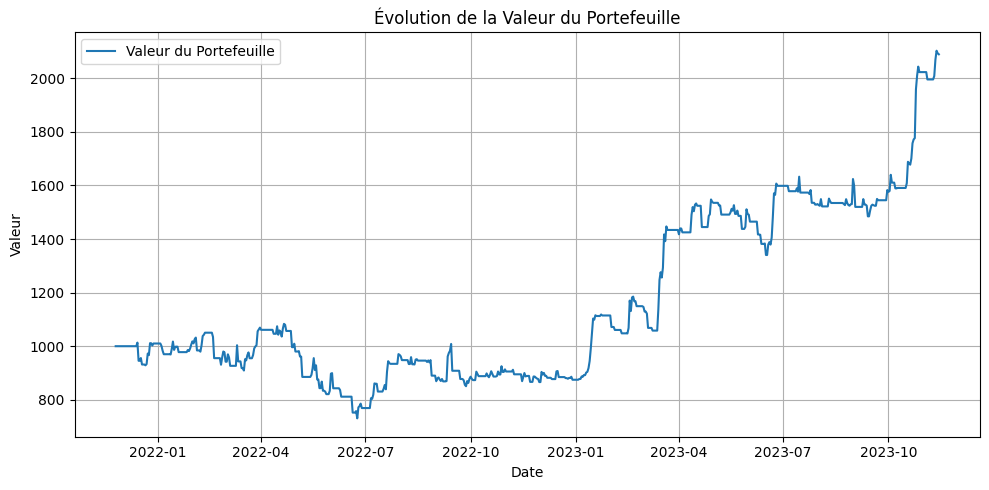

pnl: 1089.3395392578827
Normalized pnl: 11.71332837911702
Win Rate: 0.3978494623655914
Max drawdown: -0.09045173786605241
Trade number: 93
Excess return compared to B&H: 21.764699539257883


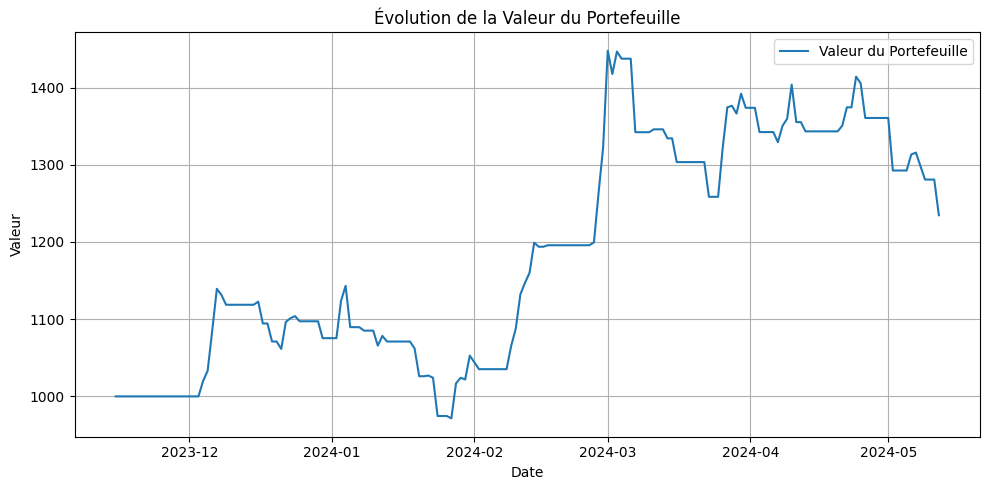

pnl: 234.6408198183126
Normalized pnl: 8.690400734011577
Win Rate: 0.4074074074074074
Max drawdown: -0.06625617932614378
Trade number: 27
Excess return compared to B&H: -25.047379180181686


In [5]:
from src.mtal.backtesting.ma_cross_backtest import MACrossBacktester 

from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.trainer import train_strategy
from src.mtal.dataviz import display_strategy_results 

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

ranges = {
        "short_ma": range(1, 20),
        "long_ma": range(1, 40),
        "ma_type": ["ema", "vwma", "hma"],
}

best_params, train_results, test_results, train_df, test_df = train_strategy(df, MACrossBacktester, ranges)

print(best_params)
display_strategy_results(train_df, train_results)
display_strategy_results(test_df, test_results)



# MA above

(2, 15, 'hma')


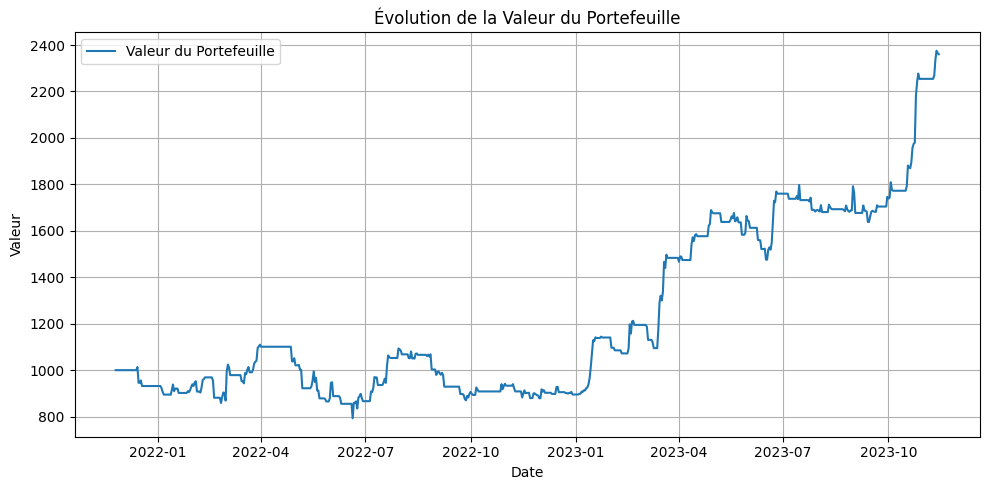

pnl: 1360.424882345293
Normalized pnl: 18.894790032573514
Win Rate: 0.4166666666666667
Max drawdown: -0.09045173786605241
Trade number: 72
Excess return compared to B&H: 22.035784882345293


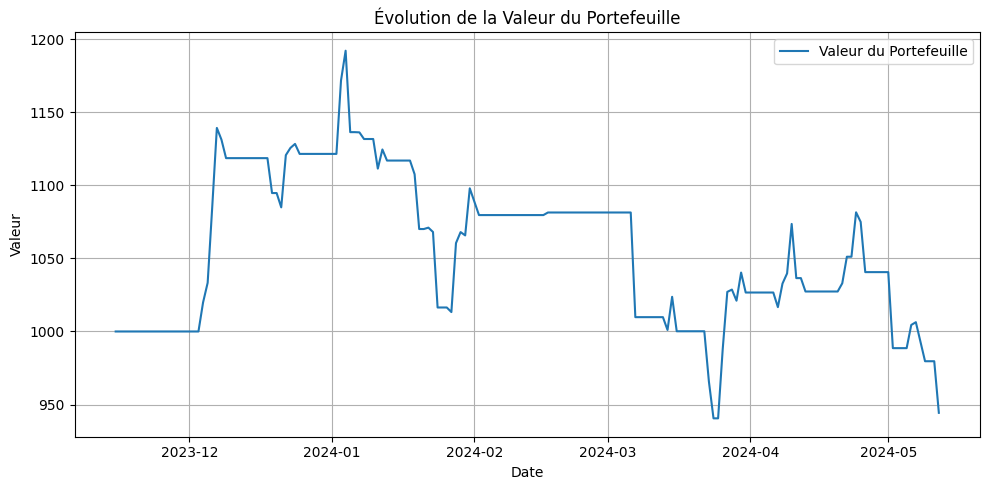

pnl: -55.68744087918685
Normalized pnl: -2.7843720439593427
Win Rate: 0.4
Max drawdown: -0.06625617932614378
Trade number: 20
Excess return compared to B&H: -25.36050744087919


In [6]:
from src.mtal.backtesting.ma_cross_backtest import MACrossPriceAboveBacktester 

from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.trainer import train_strategy
from src.mtal.dataviz import display_strategy_results 

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

ranges = {
        "short_ma": range(1, 20),
        "long_ma": range(1, 40),
        "ma_type": ["ema", "vwma", "hma"],
}

best_params, train_results, test_results, train_df, test_df = train_strategy(df, MACrossPriceAboveBacktester, ranges)

print(best_params)
display_strategy_results(train_df, train_results)
display_strategy_results(test_df, test_results)

EMA price above + close en dessous de la long: 2-5 nous donne un bon x3

# VZO-RSI

(14, -15, 5)


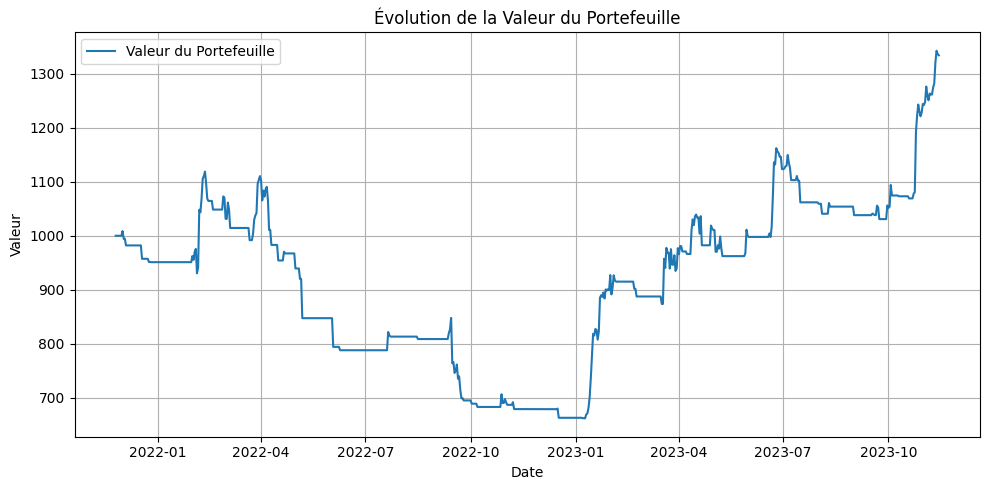

pnl: 334.39910501009126
Normalized pnl: 5.765501810518815
Win Rate: 0.27586206896551724
Max drawdown: -0.13570857078919538
Trade number: 58
Excess return compared to B&H: 21.009759105010094


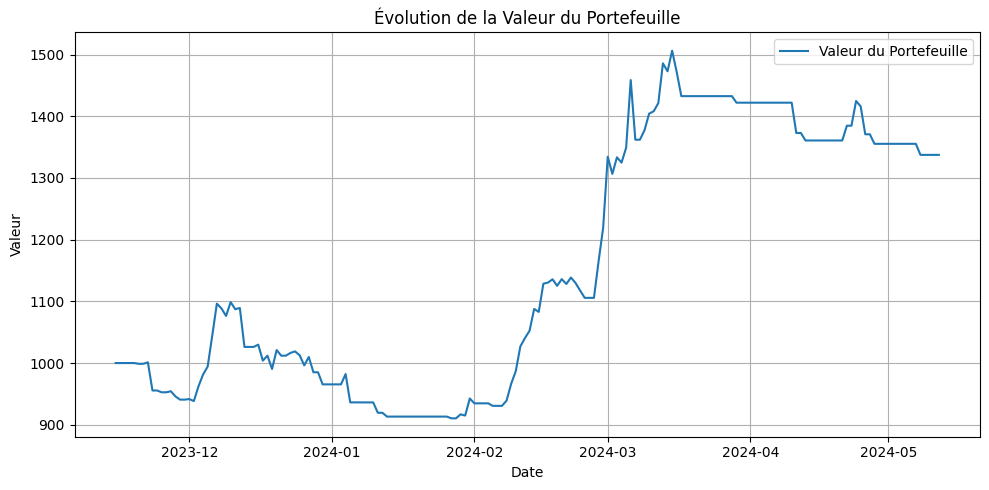

pnl: 337.43599753864464
Normalized pnl: 14.05983323077686
Win Rate: 0.25
Max drawdown: -0.04331413447480797
Trade number: 24
Excess return compared to B&H: -24.966274002461354


In [7]:
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.trainer import train_strategy
from src.mtal.backtesting.vzo_rsi import VZO_RSI
from src.mtal.dataviz import display_strategy_results 

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

ranges = {
        "span": range(13, 15),
        "grey_zone_rsi": range(-15, -10),
        "grey_zone_vzo": range(0, 10),
}

best_params, train_results, test_results, train_df, test_df = train_strategy(df, VZO_RSI, ranges)

print(best_params)
display_strategy_results(train_df, train_results)
display_strategy_results(test_df, test_results)

# VZO-RSI grey

720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720


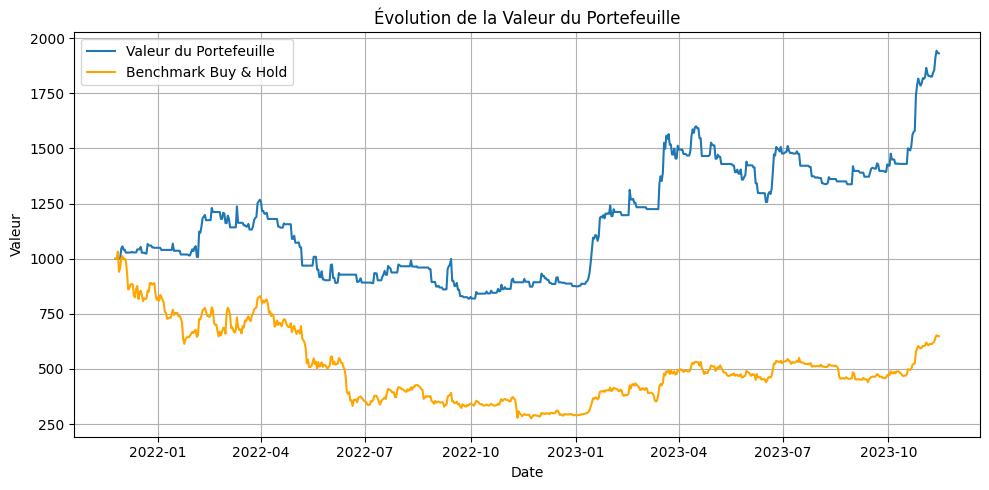

pnl: 930.8297371126821
Normalized pnl: 6.464095396615848
Win Rate: 0.3402777777777778
Max drawdown: -0.07903829680020154
Trade number: 144
Excess return compared to B&H: 21.606189737112683


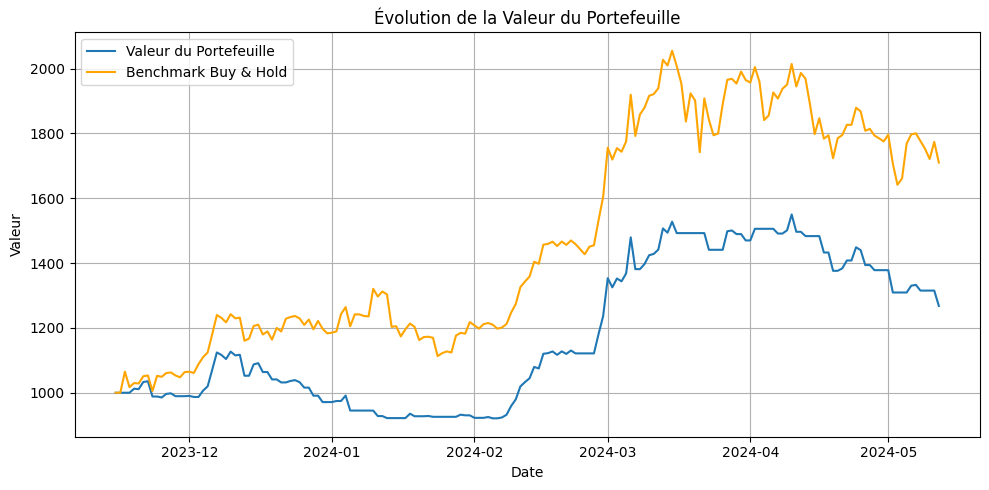

pnl: 267.7981353082207
Normalized pnl: 7.237787440762721
Win Rate: 0.3783783783783784
Max drawdown: -0.05001096044843892
Trade number: 37
Excess return compared to B&H: -25.313781864691773


In [3]:
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.trainer import train_strategy
from src.mtal.backtesting.vzo_rsi import VZO_RSI_let_grey
from src.mtal.dataviz import display_strategy_results 

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

ranges = {
        "span": range(1, 20),
        "grey_zone_rsi": range(-20, 15),
        "grey_zone_vzo": range(-20, 15),
}

best_params, train_results, test_results, train_df, test_df = train_strategy(df, VZO_RSI_let_grey, ranges)

print(best_params)
display_strategy_results(train_df, train_results)
display_strategy_results(test_df, test_results)

4033.709999999999


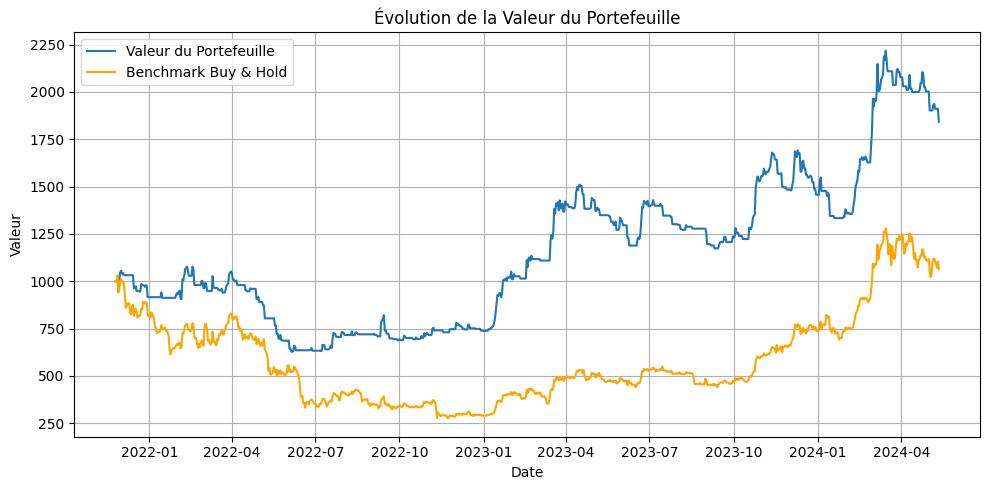

pnl: 841.943342828326
Normalized pnl: 5.929178470622014
Win Rate: 0.33098591549295775
Max drawdown: -0.08877992904949492
Trade number: 142
Buy and hold pnl: [1000, 1000, 1031.8887737102386, 940.2894276325034, 957.6945687384062, 1002.390516061996, 1011.1651923780006, 996.7144624034073, 1000.8012140370316, 988.4849546600009, 938.0933521111673, 860.2369794405816, 864.5048705517788, 882.8041581223378, 885.3773887877987, 883.3164240651934, 832.114331737964, 825.025390154308, 864.393911683391, 876.0132653602337, 817.3634527739628, 846.0750225461769, 855.2055022997713, 833.6332781397551, 807.3605282902234, 819.6689120377946, 816.9868226718021, 821.0634234941228, 855.641287129874, 850.3607650841495, 889.7502882917919, 889.4210869803771, 882.0645490090799, 888.6420997198204, 887.3461211387324, 832.0819541501858, 813.1965447338382, 824.6811376399263, 808.8609232092879, 835.2131294093684, 827.5742938754383, 812.8717187721231, 802.1242847834616, 760.4555544101863, 754.0006885050288, 727.4715431630

In [1]:
from src.mtal.backtesting.vzo_rsi import VZO_RSI_let_grey
from src.mtal.dataviz import display_strategy_results 
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
results = VZO_RSI_let_grey(df, span=5, grey_zone_rsi=-12, grey_zone_vzo=-14).run()
display_strategy_results(df, results)